# Danish Ahmed                                                   student id : 0681817

# MRI lab report note book

# Question 1:


In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('IM-0320.dcm')
# Let's print all the Metadata here
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20171115'
(0008, 0013) Instance Creation Time              TM: '112004'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.34055.5
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.34055.5.0.4164.2017111511161231369
(0008, 0020) Study Date                          DA: '20171115'
(0008, 0021) Series Date                         DA: '20171115'
(0008, 0022) Acquisition Date                    DA: '20171115'
(0008, 0023) Content Date                        DA: '20171115'
(0008, 0030) Study Time                          TM: '102824'
(0008, 0031) Series Time                         TM: '111406.73000'
(0008, 0032) Acquisition Time                    TM: '111406.73'
(0008, 0

In [2]:
from datetime import datetime

print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))
if RefDs.PatientsSex=='WM':
    print('MRI sample of water melon')
else:
    print('The patient\'s name is '+str(RefDs.PatientsName))

The image is 512x512 pixels
The image was encoded with 12 bits 
The manufacturer is Philips Medical Systems and the model is Achieva
The image was made on 2017-11-15
The patient's name is res_watermelon


[0, 511, 0, 511]

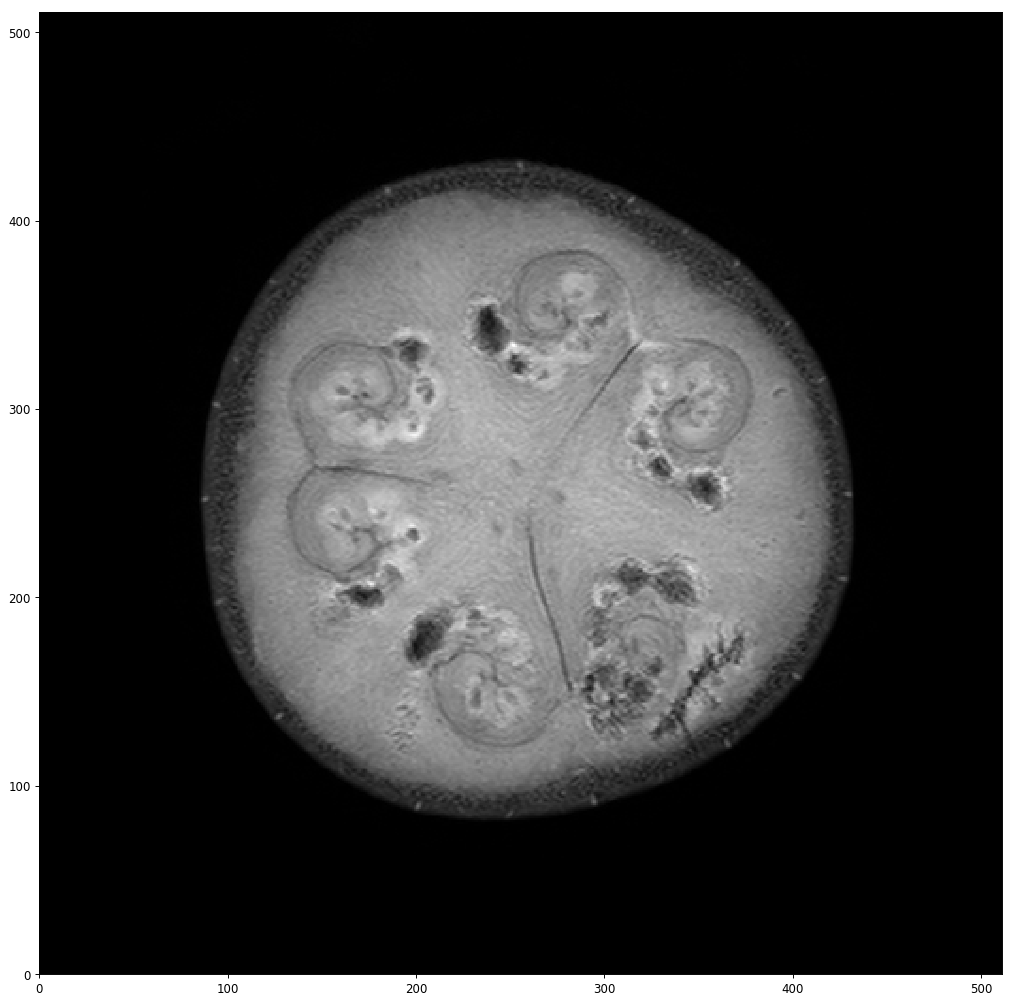

In [3]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM-0320.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(15, 15), dpi= 85, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

# Question 2:
  From the Metadata in the DICOM describe the type of MR sequence and the sequence param-eters that were used to acquire the image(s).  You should describe at minimum 5 parametersand briefly explain what those parameters refer to using your MRI lecture concepts.

# answer 2 :
# Echo time:  
Echo Time is the time in mille seconds  between the middle of the excitation pulse and the peak of the echo produced (kx=0). In the case of segmented k-space, the TE(eff) is the time between the middle of the excitation pulse to the peak of the echo that is used to cover the center of k-space (i.e.-kx=0, ky=0).
(0018, 0081) Echo Time                           DS: '80'
# Echo train : 
Number of lines in k-space acquired per excitation per image.
(0018, 0091) Echo Train Length                   IS: '15'

# Multiple spin echo:
Multiple Spin Echo category of pulse sequence used to collect different lines in k-space for a single frame. Enumerated Values: YES NO Required if Image Type (0018, 9011) Value 1 is ORIGINAL or MIXED and Echo Pulse sequence (0018,9008) equals SPIN or BOTH. Otherwise may be present if Image Type (0018, 9011) Value 1 is DERIVED and Echo Pulse sequence (0018, 9011) equals SPIN or BOTH.
(0018, 9011) Multiple Spin Echo                  CS: 'YES'

# Steady state sequence: 
Steady State Sequence. Defined Terms: FREE_PRECESSION TRANSVERSE TIME_REVERSED LONGITUDINAL NONE required if Image Type (0018, 9017) Value 1 is ORIGINAL or MIXED. May be present otherwise.
(0018, 9017) Steady State Pulse Sequence         CS: 'NONE'
 
# Echo pulse Sequence:
Echo category of pulse sequences. Enumerated Values: SPIN GRADIENT BOTH required if Image Type (0018, 9008) Value 1 is ORIGINAL or MIXED. May be present otherwise.
(0018, 9008) Echo Pulse Sequence                 CS: 'SPIN'.[1]


# Question 3
What is the difference between the Acquisition Matrix that you can find in your Metadata and the number of pixels that your image has?  Investigate why there is a difference and briefly explain?

# Answer  3
(0018, 1310) Acquisition Matrix                  US: [0, 400, 319, 0]
Here acquisition matrix means is that Dimensions of the acquired frequency /phase data before reconstruction. Multi-valued: frequency rows\frequency columns\phase rows\phase columns.
Number of pixels of IM-0320 is 512*512 its 2 dimensional pixel are the numbers of rows * numbers of column and acquisition matrix is the dimension of acquired frequency that’s the difference between the acquisition matrix and number of pixels.[1]


# Question 4
4 What is the frequency that is listed in the Metadata referring to?  Would you expect this value to change with different scanners?  What would make this value change?  Explain briefly.

# Answer 4

(0018, 0084) Imaging Frequency                   DS: '127.753952'
 
We used Magnetic resonance imaging having a magnetic field of 3 tesla .The RF frequency of 1.5 tesla is 64 MHz and the frequency of a 3 Tesla signal is 128 MHz  so here we have 127 MHz approximately to 
128 MHZ if we use different scanners having greater magnetic field like 9 tesla so the imaging frequency will be high.


# Question 5
Briefly discuss any observations and issues during acquisition?

# Answer 5
In this whole process of image acquistion we observed that no metalic things allowed to the MRI room and observe some motion artifacts of sample in this lab our team gathered all sample like water melon and egg so in this whole process we obsevered image with different slices and compare which one is the best so I took the best one image that is IM-0320 this image gives us all information its important to during acquistion to extract a better result and after that we applied more slicing techniques and the main issue in this whole process the motion artifact of sample.
and we observed two types of time scale 
T1-weighted imaging: higher spatial resolution.
n T2-weighted imaging: higher tissue contrast typically both time-scales are used .

# Refrences:

1)	(n.d.). Retrieved December 04, 2017, from http://dicomlookup.com/dicom-tables.asp
